# DATA CHALLENGE

Eline POT

In [1]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# Observation des données

In [2]:
X = pd.read_csv('Xtrain_hgcGIrA.csv')
Y = pd.read_csv('Ytrain_yL5OjS4.csv')['p0q0']
X_final = pd.read_csv('Xtest.csv')

data = pd.concat([X, Y], axis=1)

## Quelques graphiques

C:\Users\eline\AppData\Local\Temp\ipykernel_12948\1968354836.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.correlation = data.corr()
C:\Users\eline\AppData\Local\Temp\ipykernel_12948\1968354836.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.correlation = data.corr()
C:\Users\eline\AppData\Local\Temp\ipykernel_12948\1968354836.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)


<Axes: >

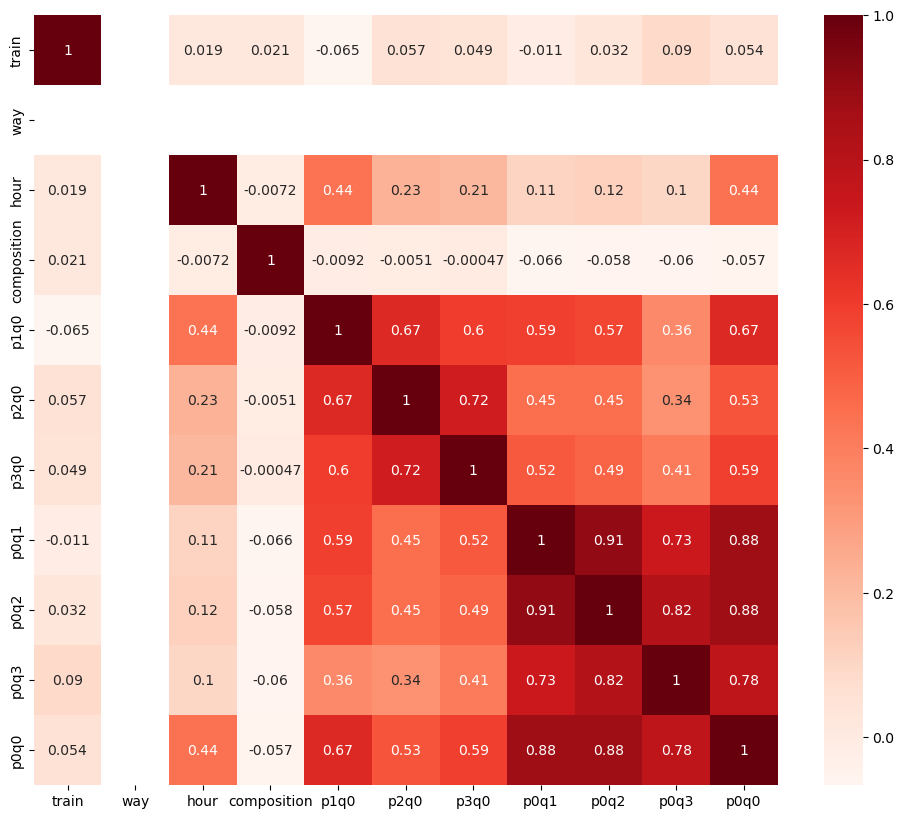

In [3]:
# on transforme hour et way en int
data["hour"] = data["hour"].fillna("00:00:00")
data["hour"] = data["hour"].apply(lambda x: int(x.split(":")[0]))
data["way"] = data["way"].apply(lambda x: int(x))

data.correlation = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)

array([[<Axes: title={'center': 'train'}>,
        <Axes: title={'center': 'way'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'composition'}>,
        <Axes: title={'center': 'p1q0'}>,
        <Axes: title={'center': 'p2q0'}>],
       [<Axes: title={'center': 'p3q0'}>,
        <Axes: title={'center': 'p0q1'}>,
        <Axes: title={'center': 'p0q2'}>],
       [<Axes: title={'center': 'p0q3'}>,
        <Axes: title={'center': 'p0q0'}>, <Axes: >]], dtype=object)

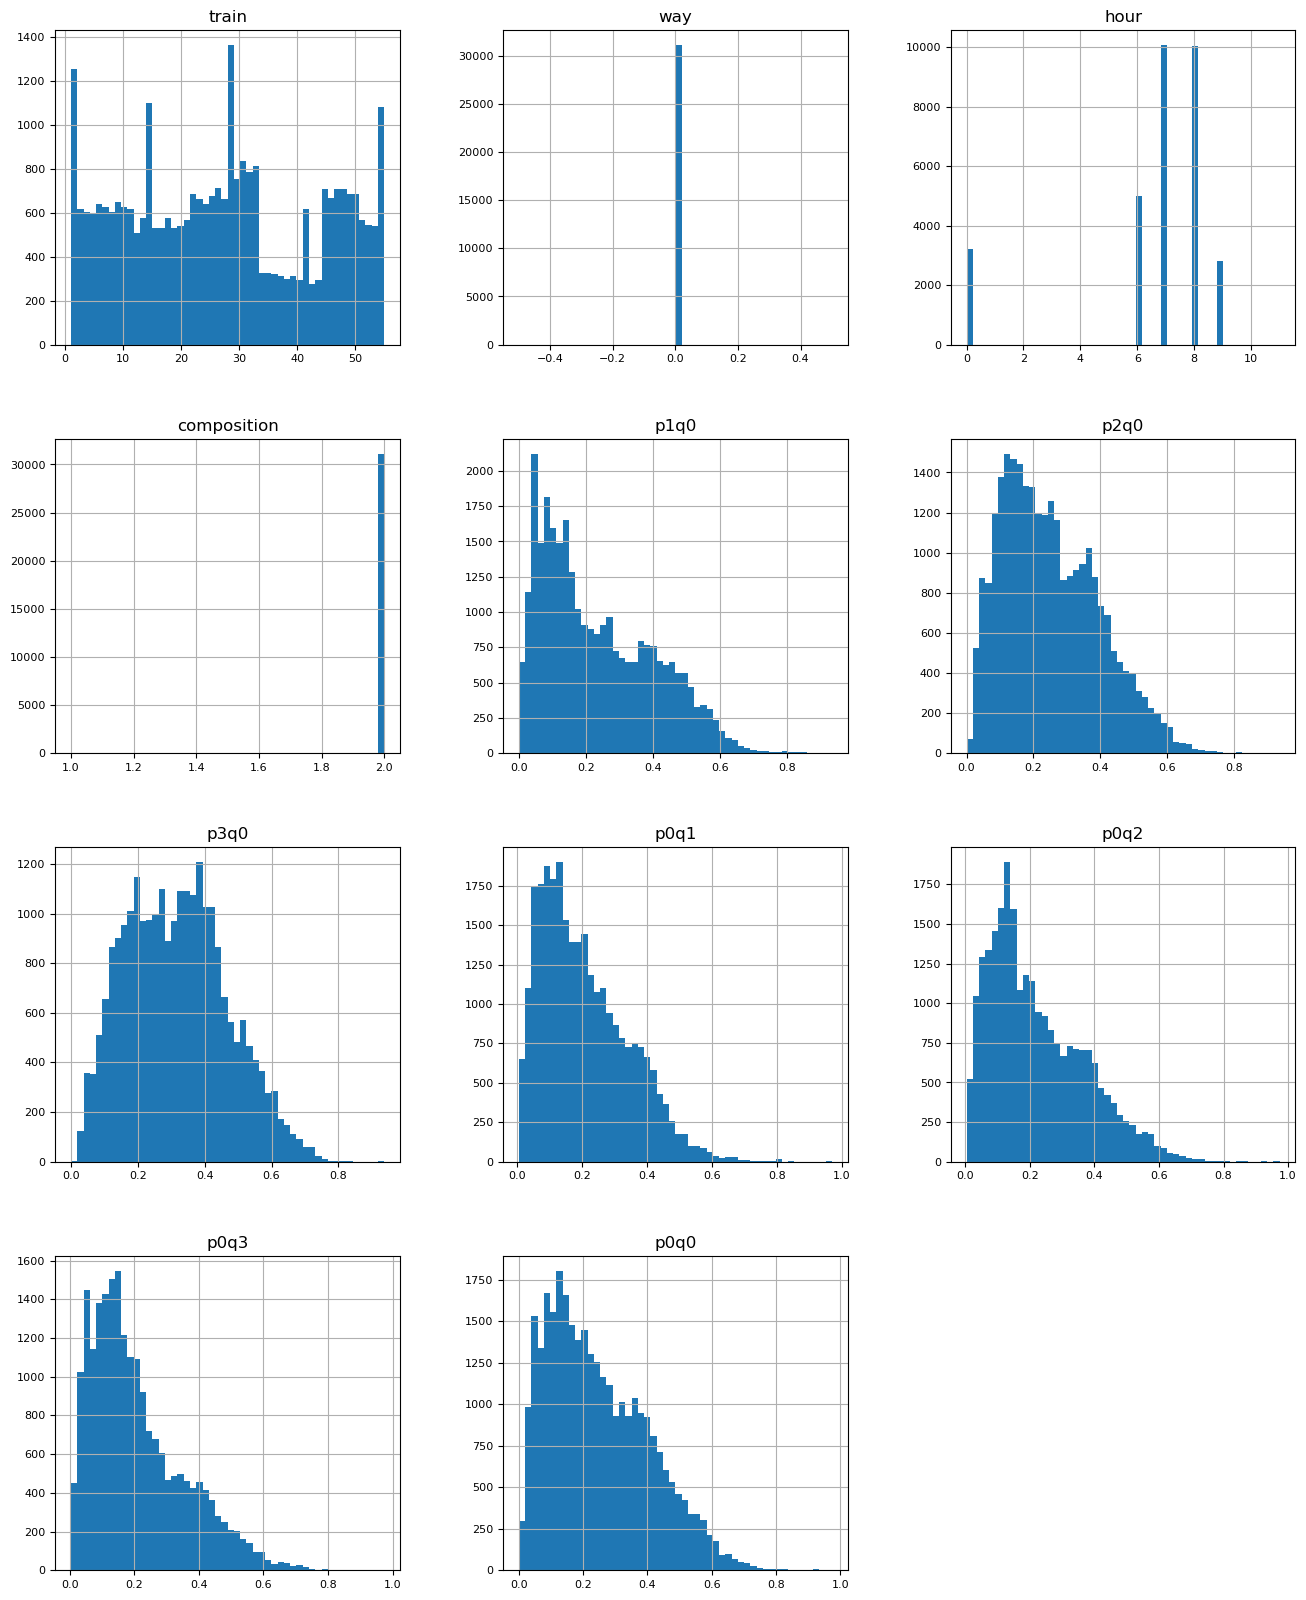

In [4]:
# histogramme des variables
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Retraits et ajouts de variables

In [5]:
data.drop(["way", "composition"], axis=1, inplace=True)
X_final.drop(["way", "composition"], axis=1, inplace=True)

In [6]:
# ajout de date of the week
data['date'] = pd.to_datetime(data['date'])
data['jour'] = data['date'].dt.dayofweek
X_final['date'] = pd.to_datetime(X_final['date'])
X_final['jour'] = X_final['date'].dt.dayofweek

## Correlations et anomalies et p0qj

In [7]:
# Correlation plot par train
grouped = data.groupby('train')

# Matrices de corrélation pour chaque groupe
correlation_matrices = {}

for group_name, group_data in grouped:
    correlation_matrix = group_data.corr()
    correlation_matrices[group_name] = correlation_matrix

liste_trains_anomalies_p1q0_p2q0 = []
liste_trains_anomalies_p2q0_p3q0 = []
liste_trains_nan = []

for group_name, correlation_matrix in correlation_matrices.items():
    p1q0_value = correlation_matrix.loc['p0q0', 'p1q0']
    p2q0_value = correlation_matrix.loc['p0q0', 'p2q0']
    p3q0_value = correlation_matrix.loc['p0q0', 'p3q0']
    
    if p1q0_value >= p2q0_value and p2q0_value >= p3q0_value:
        print(f"Pour le Train {group_name} : tout est OK")
    else:
        if p1q0_value < p2q0_value :
            print(f"Pour le Train {group_name}, p1q0 est plus PETITE que p2q0.")
            liste_trains_anomalies_p1q0_p2q0.append(group_name)
        if p2q0_value < p3q0_value : 
            print(f"Pour le Train {group_name}, p2q0 est plus PETITE que p3q0.")
            liste_trains_anomalies_p2q0_p3q0.append(group_name)
        if not p1q0_value < p2q0_value and not p2q0_value < p3q0_value :
            print(f"Pour le Train {group_name} : contient des NAN")
            liste_trains_nan.append(group_name)



print(liste_trains_anomalies_p1q0_p2q0)
print(liste_trains_anomalies_p2q0_p3q0)

liste_trains_anomalies_p1q0_p2q0_p3q0 = set(liste_trains_anomalies_p1q0_p2q0) & set(liste_trains_anomalies_p2q0_p3q0)

print(f"L'anomalie p1q0_p2q0 concerne {len(liste_trains_anomalies_p1q0_p2q0)} trains ie {100*len(liste_trains_anomalies_p1q0_p2q0)/55}% des trains")
print(f"L'anomalie p2q0_p3q0 concerne {len(liste_trains_anomalies_p2q0_p3q0)} trains ie {100*len(liste_trains_anomalies_p2q0_p3q0)/55}% des trains")
print(f"L'anomalie p1q0_p2q0 ET p2q0_p3q0 concerne {len(liste_trains_anomalies_p1q0_p2q0_p3q0)} trains ie {100*len(liste_trains_anomalies_p1q0_p2q0_p3q0)/55}% des trains")

Pour le Train 1 : tout est OK
Pour le Train 2 : tout est OK
Pour le Train 3 : tout est OK
Pour le Train 4, p2q0 est plus PETITE que p3q0.
Pour le Train 5 : tout est OK
Pour le Train 6, p2q0 est plus PETITE que p3q0.
Pour le Train 7, p2q0 est plus PETITE que p3q0.
Pour le Train 8, p2q0 est plus PETITE que p3q0.
Pour le Train 9, p2q0 est plus PETITE que p3q0.
Pour le Train 10, p2q0 est plus PETITE que p3q0.
Pour le Train 11, p2q0 est plus PETITE que p3q0.
Pour le Train 12 : contient des NAN
Pour le Train 13, p2q0 est plus PETITE que p3q0.
Pour le Train 14, p1q0 est plus PETITE que p2q0.
Pour le Train 15, p2q0 est plus PETITE que p3q0.
Pour le Train 16 : tout est OK
Pour le Train 17, p2q0 est plus PETITE que p3q0.
Pour le Train 18, p2q0 est plus PETITE que p3q0.
Pour le Train 19 : tout est OK
Pour le Train 20 : tout est OK
Pour le Train 21 : tout est OK
Pour le Train 22 : contient des NAN
Pour le Train 23, p2q0 est plus PETITE que p3q0.
Pour le Train 24, p2q0 est plus PETITE que p3q0.
Pou

C:\Users\eline\AppData\Local\Temp\ipykernel_4932\960831921.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = group_data.corr()


In [8]:
# Intervertir les colonnes p1q0 et p2q0 pour les trains dans liste_trains_anomalies_p1q0_p2q0:
for group_name, correlation_matrix in correlation_matrices.items():
    if group_name in liste_trains_anomalies_p1q0_p2q0:
        print(f"Pour le Train {group_name} : intervertir p1q0 et p2q0")
        data.loc[data['train'] == group_name, ['p1q0', 'p2q0']] = data.loc[data['train'] == group_name, ['p2q0', 'p1q0']].values
        X_final.loc[X_final['train'] == group_name, ['p1q0', 'p2q0']] = X_final.loc[X_final['train'] == group_name, ['p2q0', 'p1q0']].values


# Intervertir les colonnes p2q0 et p3q0 pour les trains dans liste_trains_anomalies_p2q0_p3q0:
for group_name, correlation_matrix in correlation_matrices.items():
    if group_name in liste_trains_anomalies_p2q0_p3q0:
        print(f"Pour le Train {group_name} : intervertir p2q0 et p3q0")
        data.loc[data['train'] == group_name, ['p2q0', 'p3q0']] = data.loc[data['train'] == group_name, ['p3q0', 'p2q0']].values
        X_final.loc[X_final['train'] == group_name, ['p2q0', 'p3q0']] = X_final.loc[X_final['train'] == group_name, ['p3q0', 'p2q0']].values

Pour le Train 14 : intervertir p1q0 et p2q0
Pour le Train 30 : intervertir p1q0 et p2q0
Pour le Train 31 : intervertir p1q0 et p2q0
Pour le Train 32 : intervertir p1q0 et p2q0
Pour le Train 34 : intervertir p1q0 et p2q0
Pour le Train 47 : intervertir p1q0 et p2q0
Pour le Train 48 : intervertir p1q0 et p2q0
Pour le Train 52 : intervertir p1q0 et p2q0
Pour le Train 4 : intervertir p2q0 et p3q0
Pour le Train 6 : intervertir p2q0 et p3q0
Pour le Train 7 : intervertir p2q0 et p3q0
Pour le Train 8 : intervertir p2q0 et p3q0
Pour le Train 9 : intervertir p2q0 et p3q0
Pour le Train 10 : intervertir p2q0 et p3q0
Pour le Train 11 : intervertir p2q0 et p3q0
Pour le Train 13 : intervertir p2q0 et p3q0
Pour le Train 15 : intervertir p2q0 et p3q0
Pour le Train 17 : intervertir p2q0 et p3q0
Pour le Train 18 : intervertir p2q0 et p3q0
Pour le Train 23 : intervertir p2q0 et p3q0
Pour le Train 24 : intervertir p2q0 et p3q0
Pour le Train 25 : intervertir p2q0 et p3q0
Pour le Train 26 : intervertir p2q0 e

In [9]:
## Verification :

# Correlation plot par train
grouped = data.groupby('train')

# Matrices de corrélation pour chaque groupe
correlation_matrices = {}

for group_name, group_data in grouped:
    correlation_matrix = group_data.corr()
    correlation_matrices[group_name] = correlation_matrix
    

liste_2_trains_anomalies_p1q0_p2q0 = []
liste_2_trains_anomalies_p2q0_p3q0 = []
liste_2_trains_nan = []

for group_name, correlation_matrix in correlation_matrices.items():
    p1q0_value = correlation_matrix.loc['p0q0', 'p1q0']
    p2q0_value = correlation_matrix.loc['p0q0', 'p2q0']
    p3q0_value = correlation_matrix.loc['p0q0', 'p3q0']
    
    if p1q0_value >= p2q0_value and p2q0_value >= p3q0_value:
        print(f"Pour le Train {group_name} : tout est OK")
    else:
        if p1q0_value < p2q0_value :
            print(f"Pour le Train {group_name}, p1q0 est plus PETITE que p2q0.")
            liste_2_trains_anomalies_p1q0_p2q0.append(group_name)
        if p2q0_value < p3q0_value : 
            print(f"Pour le Train {group_name}, p2q0 est plus PETITE que p3q0.")
            liste_2_trains_anomalies_p2q0_p3q0.append(group_name)
        if not p1q0_value < p2q0_value and not p2q0_value < p3q0_value :
            print(f"Pour le Train {group_name} : contient des NAN")
            liste_trains_nan.append(group_name)



print(liste_2_trains_anomalies_p1q0_p2q0)
print(liste_2_trains_anomalies_p2q0_p3q0)

liste__2_trains_anomalies_p1q0_p2q0_p3q0 = set(liste_2_trains_anomalies_p1q0_p2q0) & set(liste_2_trains_anomalies_p2q0_p3q0)

print(f"L'anomalie p1q0_p2q0 concerne {len(liste_2_trains_anomalies_p1q0_p2q0)} trains ie {100*len(liste_2_trains_anomalies_p1q0_p2q0)/55}% des trains")
print(f"L'anomalie p2q0_p3q0 concerne {len(liste_2_trains_anomalies_p2q0_p3q0)} trains ie {100*len(liste_2_trains_anomalies_p2q0_p3q0)/55}% des trains")
print(f"L'anomalie p1q0_p2q0 ET p2q0_p3q0 concerne {len(liste__2_trains_anomalies_p1q0_p2q0_p3q0)} trains ie {100*len(liste__2_trains_anomalies_p1q0_p2q0_p3q0)/55}% des trains")

Pour le Train 1 : tout est OK
Pour le Train 2 : tout est OK
Pour le Train 3 : tout est OK
Pour le Train 4 : tout est OK
Pour le Train 5 : tout est OK
Pour le Train 6 : tout est OK
Pour le Train 7 : tout est OK
Pour le Train 8 : tout est OK
Pour le Train 9 : tout est OK
Pour le Train 10 : tout est OK
Pour le Train 11 : tout est OK
Pour le Train 12 : contient des NAN
Pour le Train 13, p1q0 est plus PETITE que p2q0.
Pour le Train 14 : tout est OK
Pour le Train 15 : tout est OK
Pour le Train 16 : tout est OK
Pour le Train 17 : tout est OK
Pour le Train 18 : tout est OK
Pour le Train 19 : tout est OK
Pour le Train 20 : tout est OK
Pour le Train 21 : tout est OK
Pour le Train 22 : contient des NAN
Pour le Train 23, p1q0 est plus PETITE que p2q0.
Pour le Train 24, p1q0 est plus PETITE que p2q0.
Pour le Train 25, p1q0 est plus PETITE que p2q0.
Pour le Train 26, p1q0 est plus PETITE que p2q0.
Pour le Train 27, p1q0 est plus PETITE que p2q0.
Pour le Train 28, p1q0 est plus PETITE que p2q0.
Pour 

C:\Users\eline\AppData\Local\Temp\ipykernel_4932\1819705642.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = group_data.corr()


On recommence la manipulation:

In [10]:
# Intervertir les colonnes p1q0 et p2q0 pour les trains dans liste_trains_anomalies_p1q0_p2q0:
for group_name, correlation_matrix in correlation_matrices.items():
    if group_name in liste_2_trains_anomalies_p1q0_p2q0:
        print(f"Pour le Train {group_name} : intervertir p1q0 et p2q0")
        data.loc[data['train'] == group_name, ['p1q0', 'p2q0']] = data.loc[data['train'] == group_name, ['p2q0', 'p1q0']].values
        X_final.loc[X_final['train'] == group_name, ['p1q0', 'p2q0']] = X_final.loc[X_final['train'] == group_name, ['p2q0', 'p1q0']].values

# Intervertir les colonnes p2q0 et p3q0 pour les trains dans liste_trains_anomalies_p2q0_p3q0:
for group_name, correlation_matrix in correlation_matrices.items():
    if group_name in liste_2_trains_anomalies_p2q0_p3q0:
        print(f"Pour le Train {group_name} : intervertir p2q0 et p3q0")
        data.loc[data['train'] == group_name, ['p2q0', 'p3q0']] = data.loc[data['train'] == group_name, ['p3q0', 'p2q0']].values
        X_final.loc[X_final['train'] == group_name, ['p2q0', 'p3q0']] = X_final.loc[X_final['train'] == group_name, ['p3q0', 'p2q0']].values

Pour le Train 13 : intervertir p1q0 et p2q0
Pour le Train 23 : intervertir p1q0 et p2q0
Pour le Train 24 : intervertir p1q0 et p2q0
Pour le Train 25 : intervertir p1q0 et p2q0
Pour le Train 26 : intervertir p1q0 et p2q0
Pour le Train 27 : intervertir p1q0 et p2q0
Pour le Train 28 : intervertir p1q0 et p2q0
Pour le Train 29 : intervertir p1q0 et p2q0
Pour le Train 31 : intervertir p1q0 et p2q0
Pour le Train 32 : intervertir p1q0 et p2q0
Pour le Train 33 : intervertir p1q0 et p2q0
Pour le Train 49 : intervertir p1q0 et p2q0
Pour le Train 50 : intervertir p1q0 et p2q0
Pour le Train 52 : intervertir p1q0 et p2q0
Pour le Train 53 : intervertir p1q0 et p2q0
Pour le Train 55 : intervertir p1q0 et p2q0
Pour le Train 48 : intervertir p2q0 et p3q0


In [11]:
## Verification :

# Correlation plot par train
grouped = data.groupby('train')

# Matrices de corrélation pour chaque groupe
correlation_matrices = {}

for group_name, group_data in grouped:
    correlation_matrix = group_data.corr()
    correlation_matrices[group_name] = correlation_matrix
    

liste_3_trains_anomalies_p1q0_p2q0 = []
liste_3_trains_anomalies_p2q0_p3q0 = []
liste_3_trains_nan = []

for group_name, correlation_matrix in correlation_matrices.items():
    p1q0_value = correlation_matrix.loc['p0q0', 'p1q0']
    p2q0_value = correlation_matrix.loc['p0q0', 'p2q0']
    p3q0_value = correlation_matrix.loc['p0q0', 'p3q0']
    
    if p1q0_value >= p2q0_value and p2q0_value >= p3q0_value:
        print(f"Pour le Train {group_name} : tout est OK")
    else:
        if p1q0_value < p2q0_value :
            print(f"Pour le Train {group_name}, p1q0 est plus PETITE que p2q0.")
            liste_3_trains_anomalies_p1q0_p2q0.append(group_name)
        if p2q0_value < p3q0_value : 
            print(f"Pour le Train {group_name}, p2q0 est plus PETITE que p3q0.")
            liste_3_trains_anomalies_p2q0_p3q0.append(group_name)
        if not p1q0_value < p2q0_value and not p2q0_value < p3q0_value :
            print(f"Pour le Train {group_name} : contient des NAN")
            liste_trains_nan.append(group_name)



print(liste_3_trains_anomalies_p1q0_p2q0)
print(liste_3_trains_anomalies_p2q0_p3q0)

liste_3_trains_anomalies_p1q0_p2q0_p3q0 = set(liste_3_trains_anomalies_p1q0_p2q0) & set(liste_3_trains_anomalies_p2q0_p3q0)

print(f"L'anomalie p1q0_p2q0 concerne {len(liste_3_trains_anomalies_p1q0_p2q0)} trains ie {100*len(liste_3_trains_anomalies_p1q0_p2q0)/55}% des trains")
print(f"L'anomalie p2q0_p3q0 concerne {len(liste_3_trains_anomalies_p2q0_p3q0)} trains ie {100*len(liste_3_trains_anomalies_p2q0_p3q0)/55}% des trains")
print(f"L'anomalie p1q0_p2q0 ET p2q0_p3q0 concerne {len(liste_3_trains_anomalies_p1q0_p2q0_p3q0)} trains ie {100*len(liste_3_trains_anomalies_p1q0_p2q0_p3q0)/55}% des trains")

Pour le Train 1 : tout est OK
Pour le Train 2 : tout est OK
Pour le Train 3 : tout est OK
Pour le Train 4 : tout est OK
Pour le Train 5 : tout est OK
Pour le Train 6 : tout est OK
Pour le Train 7 : tout est OK
Pour le Train 8 : tout est OK
Pour le Train 9 : tout est OK
Pour le Train 10 : tout est OK
Pour le Train 11 : tout est OK
Pour le Train 12 : contient des NAN
Pour le Train 13 : tout est OK
Pour le Train 14 : tout est OK
Pour le Train 15 : tout est OK
Pour le Train 16 : tout est OK
Pour le Train 17 : tout est OK
Pour le Train 18 : tout est OK
Pour le Train 19 : tout est OK
Pour le Train 20 : tout est OK
Pour le Train 21 : tout est OK
Pour le Train 22 : contient des NAN
Pour le Train 23 : tout est OK
Pour le Train 24 : tout est OK
Pour le Train 25 : tout est OK
Pour le Train 26 : tout est OK
Pour le Train 27 : tout est OK
Pour le Train 28 : tout est OK
Pour le Train 29 : tout est OK
Pour le Train 30 : tout est OK
Pour le Train 31 : tout est OK
Pour le Train 32 : tout est OK
Pour le

C:\Users\eline\AppData\Local\Temp\ipykernel_4932\405313072.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = group_data.corr()


## Etude et remise en forme des trajets

C:\Users\eline\AppData\Local\Temp\ipykernel_4932\1112043436.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(['train', 'station']).mean().reset_index()
C:\Users\eline\AppData\Local\Temp\ipykernel_4932\1112043436.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_data = df.pivot('train', 'station', 'p0q0')


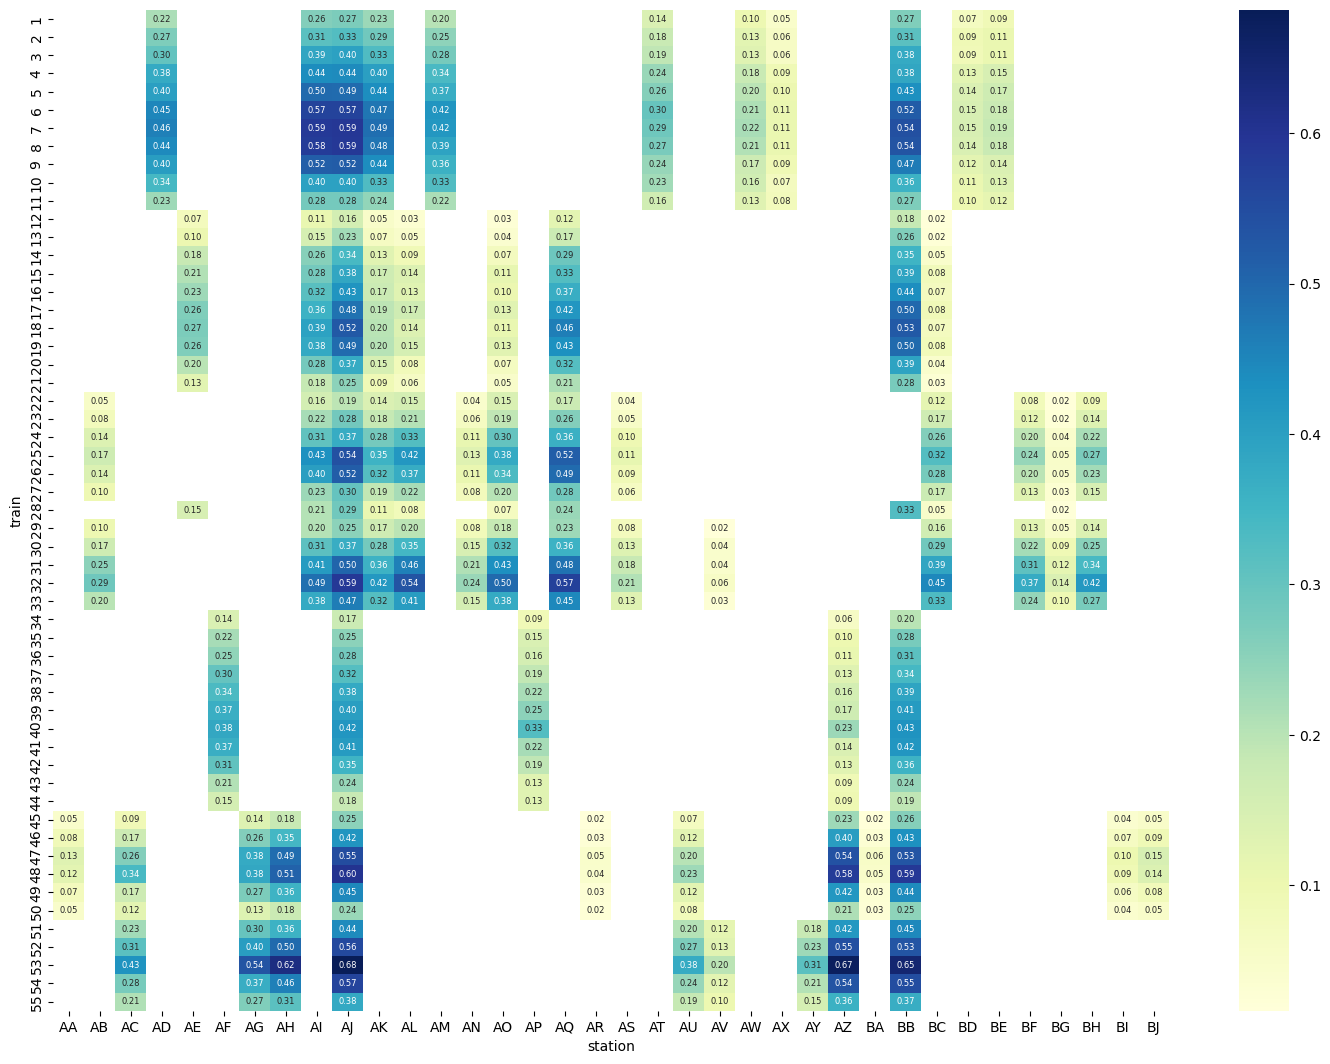

In [12]:
# heatmap de p0q0 en fonction de train et station

df = data.groupby(['train', 'station']).mean().reset_index()
pivot_data = df.pivot('train', 'station', 'p0q0')

fig, ax = plt.subplots(figsize=(18,13))
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap="YlGnBu", annot_kws = {"size": 6})

plt.xlabel('station')
plt.ylabel('train')
plt.show()

### TRAJET 1

In [13]:
trajet_1 = range(1, 12)

order = ['AX', 'BD', 'BE', 'AW', 'AT', 'AM', 'AD', 'AK', 'AI', 'AJ', 'BB']
station_erronnees = ['BE', 'AW', 'AT', 'AI', 'AJ', 'BB']

dic = {'BE': {'from': ['p0q1', 'p0q2'], 'to':['p0q2', 'p0q1']},
       'AW': {'from': ['p0q1', 'p0q3'], 'to':['p0q3', 'p0q1']},
       'AT': {'from': ['p0q2', 'p0q3'], 'to':['p0q3', 'p0q2']},
       'AI': {'from': ['p0q1', 'p0q2'], 'to':['p0q2', 'p0q1']},
       'AJ': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q2', 'p0q3', 'p0q1']},
       'BB': {'from': ['p0q1', 'p0q2'], 'to':['p0q2', 'p0q1']},
}

for t in trajet_1:
    for s in station_erronnees:
        mask = (data['train'] == t) & (data['station'] == s) 
        data.loc[mask, dic[s]['from']] = data.loc[mask, dic[s]['to']].values
        mask = (X_final['train'] == t) & (X_final['station'] == s) 
        X_final.loc[mask, dic[s]['from']] = X_final.loc[mask, dic[s]['to']].values

### TRAJET 2

In [14]:
trajet_2 = range(12, 22)

order = ['BC', 'AO', 'AL', 'AK', 'AE', 'AI', 'AQ', 'AJ', 'BB']

station_erronnees = ['AQ', 'AJ', 'BB']

dic = {'AQ': {'from': ['p0q1', 'p0q2'], 'to':['p0q2', 'p0q1']},
       'AJ': {'from': ['p0q1', 'p0q3'], 'to':['p0q3', 'p0q1']},
       'BB': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q2', 'p0q3', 'p0q1']}
}

for t in trajet_2:
    for s in station_erronnees:
        mask = (data['train'] == t) & (data['station'] == s) 
        data.loc[mask, dic[s]['from']] = data.loc[mask, dic[s]['to']].values
        mask = (X_final['train'] == t) & (X_final['station'] == s) 
        X_final.loc[mask, dic[s]['from']] = X_final.loc[mask, dic[s]['to']].values


### TRAJET 3

In [15]:
trajet_3 = range(22, 28)

order = ['BG', 'AS', 'AN', 'AB', 'BF', 'BH', 'BC', 'AO', 'AL', 'AK', 'AI', 'AQ', 'AJ']

station_erronnees = ['BH', 'BC', 'AO', 'AJ']

dic = {'BH': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q3', 'p0q1', 'p0q2']},
       'BC': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q3', 'p0q2', 'p0q1']},
       'AO': {'from': ['p0q2', 'p0q3'], 'to':['p0q3', 'p0q2']},
       'AJ': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q3', 'p0q1', 'p0q2']}
}

for t in trajet_3:
    for s in station_erronnees:
        mask = (data['train'] == t) & (data['station'] == s) 
        data.loc[mask, dic[s]['from']] = data.loc[mask, dic[s]['to']].values
        mask = (X_final['train'] == t) & (X_final['station'] == s) 
        X_final.loc[mask, dic[s]['from']] = X_final.loc[mask, dic[s]['to']].values

### TRAJET 4

In [16]:
trajet_4 = range(28, 29)

order = ['BG', 'BC', 'AO', 'AL', 'AK', 'AE', 'AI', 'AQ', 'AJ', 'BB' ]

station_erronnees = ['AQ', 'AJ', 'BB']

dic = {'AQ': {'from': ['p0q1', 'p0q2'], 'to':['p0q2', 'p0q1']},
       'AJ': {'from': ['p0q1', 'p0q3'], 'to':['p0q3', 'p0q1']},
       'BB': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q2', 'p0q3', 'p0q1']}
}

for t in trajet_4:
    for s in station_erronnees:
        mask = (data['train'] == t) & (data['station'] == s) 
        data.loc[mask, dic[s]['from']] = data.loc[mask, dic[s]['to']].values
        mask = (X_final['train'] == t) & (X_final['station'] == s) 
        X_final.loc[mask, dic[s]['from']] = X_final.loc[mask, dic[s]['to']].values

### TRAJET 5

In [17]:
trajet_5 = range(29, 34)

order = ['BG', 'AS', 'AN', 'AB', 'BF', 'BH', 'BC', 'AO', 'AL', 'AV', 'AK', 'AI', 'AQ', 'AJ']

station_erronnees = ['BC', 'BH', 'AO', 'AK', 'AI', 'AJ']

dic = {'BC': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q3', 'p0q2', 'p0q1']},
       'BH': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q3', 'p0q1', 'p0q2']},
       'AO': {'from': ['p0q2', 'p0q3'], 'to':['p0q3', 'p0q2']},
       'AK': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q3', 'p0q1', 'p0q2']},
       'AI': {'from': ['p0q2', 'p0q3'], 'to':['p0q3', 'p0q2']},
       'AJ': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q3', 'p0q1', 'p0q2']}
       
}

for t in trajet_5:
    for s in station_erronnees:
        mask = (data['train'] == t) & (data['station'] == s) 
        data.loc[mask, dic[s]['from']] = data.loc[mask, dic[s]['to']].values
        mask = (X_final['train'] == t) & (X_final['station'] == s) 
        X_final.loc[mask, dic[s]['from']] = X_final.loc[mask, dic[s]['to']].values

### TRAJET 6

In [18]:
trajet_6 =  range(34, 45)

order = ['AZ', 'AP', 'AF', 'AJ', 'BB' ]

station_erronnees = ['BB']

dic = {'BB': {'from': ['p0q1', 'p0q2'], 'to':['p0q2', 'p0q1']}     
}

for t in trajet_6:
    for s in station_erronnees:
        mask = (data['train'] == t) & (data['station'] == s) 
        data.loc[mask, dic[s]['from']] = data.loc[mask, dic[s]['to']].values
        mask = (X_final['train'] == t) & (X_final['station'] == s) 
        X_final.loc[mask, dic[s]['from']] = X_final.loc[mask, dic[s]['to']].values

### TRAJET 7

In [19]:
trajet_7 = range(45, 51)
order = ['AR', 'BA', 'BI', 'AA', 'BJ', 'AU', 'AC', 'AG', 'AH', 'AZ' , 'AJ', 'BB']

station_erronnees = ['BI', 'AA', 'BJ', 'AU', 'AC', 'AH', 'AZ', 'AJ', 'BB' ]

dic = {'BI': {'from': ['p0q1', 'p0q2'], 'to':['p0q2', 'p0q1']},
       'AA': {'from': ['p0q1', 'p0q3'], 'to':['p0q3', 'p0q1']},
       'BJ': {'from': ['p0q3', 'p0q2'], 'to':['p0q2', 'p0q3']},
       'AU': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q3', 'p0q1', 'p0q2']},
       'AC': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q2', 'p0q3', 'p0q1']},
       'AH': {'from': ['p0q1', 'p0q2'], 'to':['p0q2', 'p0q1']},
       'AZ': {'from': ['p0q1', 'p0q3'], 'to':['p0q3', 'p0q1']},
       'AJ': {'from': ['p0q1', 'p0q3'], 'to':['p0q3', 'p0q1']},
       'BB': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q2', 'p0q3', 'p0q1']}
}

for t in trajet_7:
    for s in station_erronnees:
        mask = (data['train'] == t) & (data['station'] == s) 
        data.loc[mask, dic[s]['from']] = data.loc[mask, dic[s]['to']].values
        mask = (X_final['train'] == t) & (X_final['station'] == s) 
        X_final.loc[mask, dic[s]['from']] = X_final.loc[mask, dic[s]['to']].values


### TRAJET 8

In [20]:
trajet_8 = range(51, 56)
order = ['AV', 'AY', 'AU', 'AC', 'AG', 'AH', 'AZ', 'AJ','BB' ]

station_erronnees = ['AU', 'AH', 'AZ', 'AJ', 'BB' ]

dic = {'AU': {'from': ['p0q1', 'p0q2'], 'to':['p0q2', 'p0q1']},
       'AC': {'from': ['p0q2', 'p0q3'], 'to':['p0q3', 'p0q2']},
       'AH': {'from': ['p0q1', 'p0q2'], 'to':['p0q2', 'p0q1']},
       'AZ': {'from': ['p0q1', 'p0q3'], 'to':['p0q3', 'p0q1']},
       'AJ': {'from': ['p0q1', 'p0q3'], 'to':['p0q3', 'p0q1']},
       'BB': {'from': ['p0q1', 'p0q2', 'p0q3'], 'to':['p0q2', 'p0q3', 'p0q1']}
}

for t in trajet_8:
    for s in station_erronnees:
        mask = (data['train'] == t) & (data['station'] == s) 
        data.loc[mask, dic[s]['from']] = data.loc[mask, dic[s]['to']].values
        mask = (X_final['train'] == t) & (X_final['station'] == s) 
        X_final.loc[mask, dic[s]['from']] = X_final.loc[mask, dic[s]['to']].values

### Rajout de la colonne Trajet

In [21]:
def assign_trajet(row):
    for i, trajet in enumerate([trajet_1, trajet_2, trajet_3, trajet_4, trajet_5, trajet_6, trajet_7, trajet_8]):
        if row['train'] in trajet:
            return f"trajet_{i+1}"

data['trajet'] = data.apply(assign_trajet, axis=1)
X_final['trajet'] = X_final.apply(assign_trajet, axis=1)

### Rajout du N° de la station dans l'ordre du trajet

In [22]:
order_1 = ['AX', 'BD', 'BE', 'AW', 'AT', 'AM', 'AD', 'AK', 'AI', 'AJ', 'BB']
order_2 = ['BC', 'AO', 'AL', 'AK', 'AE', 'AI', 'AQ', 'AJ', 'BB']
order_3 = ['BG', 'AS', 'AN', 'AB', 'BF', 'BH', 'BC', 'AO', 'AL', 'AK', 'AI', 'AQ', 'AJ']
order_4 = ['BG', 'BC', 'AO', 'AL', 'AK', 'AE', 'AI', 'AQ', 'AJ', 'BB' ]
order_5 = ['BG', 'AS', 'AN', 'AB', 'BF', 'BH', 'BC', 'AO', 'AL', 'AV', 'AK', 'AI', 'AQ', 'AJ']
order_6 = ['AZ', 'AP', 'AF', 'AJ', 'BB' ]
order_7 = ['AR', 'BA', 'BI', 'AA', 'BJ', 'AU', 'AC', 'AG', 'AH', 'AZ' , 'AJ', 'BB']
order_8 = ['AV', 'AY', 'AU', 'AC', 'AG', 'AH', 'AZ', 'AJ','BB' ]

orders = [order_1, order_2, order_3, order_4, order_5, order_6, order_7, order_8]

In [23]:
def station_number(row):
    for i, trajet in enumerate([trajet_1, trajet_2, trajet_3, trajet_4, trajet_5, trajet_6, trajet_7, trajet_8]):
        order = orders[i]
        if row['train'] in trajet:
            station = row['station']
            return order.index(station)

data['station_number'] = data.apply(station_number, axis=1)
X_final['station_number'] = X_final.apply(station_number, axis=1)

## Accès à la variable p0q0 en regardant la station d'après

In [24]:
# prediction sur data:
def prediction(row):
    mask = (data['train'] == row['train']) & (data['date'] == row['date']) & (data['station_number'] == (row['station_number'] + 1))

    i = int(row['trajet'][-1])-1
    order = orders[i]

    result = data.loc[mask, 'p0q1']
    
    if row['station_number'] == len(order) - 1:
        return "FIN"
    
    return result.values[0] if not result.empty else None

data['prediction'] = data.apply(prediction, axis=1)

In [25]:
# prediction sur X_final:
def prediction(row):
    mask = (X_final['train'] == row['train']) & (X_final['date'] == row['date']) & (X_final['station_number'] == (row['station_number'] + 1))

    i = int(row['trajet'][-1])-1
    order = orders[i]

    result = X_final.loc[mask, 'p0q1']
    
    if row['station_number'] == len(order) - 1:
        return "FIN"
    
    return result.values[0] if not result.empty else None

X_final['prediction'] = X_final.apply(prediction, axis=1)

# Analyse des dernières stations ('FIN')

In [26]:
dic = {1: [13, 'p2q0'],
           2: [28, 'p2q0'],
           3: [14, 'p2q0'],
           4: [15, 'p1q0'],
           5: [47, 'p2q0'],
           6: [53, 'p2q0'],
           7: [48, 'p3q0'],
           8: [42, 'p1q0'],
           9: [49, 'p2q0'],
           10: [21, 'p1q0'],
           11: [50, 'p2q0'],
           12: [34, 'p2q0'],
           13: [35, 'p2q0'],
           14: [37, 'p3q0'],
           15: [47, 'p1q0'],
           16: [39, 'p3q0'],
           17: [40, 'p2q0'],
           18: [54, 'p3q0'],
           19: [42, 'p3q0'],
           20: [43, 'p2q0'],
           21: [11, 'p1q0'],
           22: [12, 'p1q0'],
           23: [36, 'p1q0'],
           24: [15, 'p3q0'],
           25: [17, 'p3q0'],
           26: [42, 'p3q0'],
           27: [21, 'p2q0'],
           28: [36, 'p2q0'],
           29: [13, 'p3q0'],
           30: [37, 'p3q0'],
           31: [6, 'p3q0'],
           32: [18, 'p3q0'],
           33: [10, 'p3q0'],
           34: [1, 'p2q0'],
           35: [2, 'p2q0'],
           36: [14, 'p1q0'],
           37: [4, 'p3q0'],
           38: [47, 'p3q0'],
           39: [17, 'p3q0'],
           40: [48, 'p2q0'],
           41: [19, 'p2q0'],
           42: [20, 'p2q0'],
           43: [21, 'p2q0'],
           44: [50, 'p1q0'],
           45: [13, 'p1q0'],
           46: [14, 'p3q0'],
           47: [16, 'p3q0'],
           48: [41, 'p3q0'],
           49: [10, 'p2q0'],
           51: [3, 'p3q0'],
           52: [38, 'p2q0'],
           53: [17, 'p2q0'],
           54: [19, 'p3q0'],
           55: [21, 'p3q0']}
    
dic_station_fin = {'trajet_1': 'BB',
                       'trajet_2': 'BB',
                       'trajet_3': 'AJ',
                       'trajet_4': 'BB',
                       'trajet_5': 'AJ',
                       'trajet_6': 'BB',
                       'trajet_7': 'BB',
                       'trajet_8': 'BB'}

In [27]:
# prediction sur data:
def prediction_FIN(row):    
    t = row['train']
    
    if t== 50:
        return "FIN"
    
    else:
        if row['prediction'] == "FIN":
            mask =  (data['date']==row['date']) & ((data['train']==row['train']) | (data['station']==dic_station_fin[row['trajet']]))
            data_mask = data.loc[mask, :]

            mask2 = (data_mask['station']==dic_station_fin[row['trajet']]) & (data_mask['train']==dic[t][0])
            result = data_mask.loc[mask2, (dic[t][1])]
            return result.values[0] if not result.empty else None
        
    

data['prediction_FIN'] = data.apply(prediction_FIN, axis=1)

In [28]:
# prediction sur Xfinal:
def prediction_FIN_Xfinal(row):
    t = row['train']
    
    if t== 50:
        return "FIN"

    else:
        if row['prediction'] == "FIN":
            mask =  (X_final['date']==row['date']) & ((X_final['train']==row['train']) | (X_final['station']==dic_station_fin[row['trajet']]))
            data_mask = X_final.loc[mask, :]

            mask2 = (data_mask['station']==dic_station_fin[row['trajet']]) & (data_mask['train']==dic[t][0])
            result = data_mask.loc[mask2, (dic[t][1])]
            return result.values[0] if not result.empty else None

    
    

X_final['prediction_FIN'] = X_final.apply(prediction_FIN_Xfinal, axis=1)

In [29]:
# on met les données 'prediction_FIN' dans 'prediction' si cela est possible :
mask = (data['prediction_FIN'].notnull()) & (data['prediction_FIN'] !='FIN')
data.loc[mask,'prediction'] = data.loc[mask,'prediction_FIN']
mask = (X_final['prediction_FIN'].notnull()) & (X_final['prediction_FIN'] !='FIN')
X_final.loc[mask,'prediction'] = X_final.loc[mask,'prediction_FIN']

# Modeles de Machine Learning

## Preprocess des données

In [30]:
# on remplace les NAN des colonnes piqj par -1 et celles de prediction_FIN par -1:
data = data.fillna(-1)
X_final = X_final.fillna(-1)

In [31]:
# on enleve les colonnes date et hour:
data.drop(['date', 'hour'], axis=1, inplace=True)
X_final.drop(['date', 'hour'], axis=1, inplace=True)

In [32]:
# on remplace les valeurs string 'FIN' de la colonne prediction et de la colonne prediction_FIN par -1:
data['prediction'] = data['prediction'].replace('FIN', -1)
data['prediction_FIN'] = data['prediction_FIN'].replace('FIN', -1)
X_final['prediction'] = X_final['prediction'].replace('FIN', -1)
X_final['prediction_FIN'] = X_final['prediction_FIN'].replace('FIN', -1)

In [33]:
# on remplace les 'trajet_i' par l'entier i à l'aide d'une fonction:
def trajet_to_int(row):
    return int(row['trajet'][-1])

data['trajet'] = data.apply(trajet_to_int, axis=1)
X_final['trajet'] = X_final.apply(trajet_to_int, axis=1)

In [34]:
# on encode la colonne station:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['station'] = labelencoder.fit_transform(data['station'])
X_final['station'] = labelencoder.transform(X_final['station'])

In [35]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13752 entries, 0 to 13751
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   train           13752 non-null  int64  
 1   station         13752 non-null  int32  
 2   p1q0            13752 non-null  float64
 3   p2q0            13752 non-null  float64
 4   p3q0            13752 non-null  float64
 5   p0q1            13752 non-null  float64
 6   p0q2            13752 non-null  float64
 7   p0q3            13752 non-null  float64
 8   jour            13752 non-null  int64  
 9   trajet          13752 non-null  int64  
 10  station_number  13752 non-null  int64  
 11  prediction      13752 non-null  float64
 12  prediction_FIN  13752 non-null  float64
dtypes: float64(8), int32(1), int64(4)
memory usage: 1.3 MB


## SVM

In [36]:
# # modele SVM avec RandomizedSearchCV:
# from sklearn.svm import SVR
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import train_test_split

# # on separe les donnees en train et test:
# X = data.drop(['p0q0'], axis=1)
# y = data['p0q0']
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.1, random_state=42)

# # on definit les parametres de la grille de recherche:
# param_grid = {'C': [0.1, 1, 10], 
#               'gamma': [1, 0.5, 0.1, 0.01],
#               'kernel': ['rbf'],
#               'epsilon': [0.05, 0.1, 0.2, 0.3]
# }

# # on definit le modele:
# svr = SVR()

# # on definit la grille de recherche:
# CV_svr = RandomizedSearchCV(svr, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv= 5, verbose=2, random_state=42)

# # on entraine le modele:
# CV_svr.fit(Xtrain, Ytrain)

# # on affiche les meilleurs parametres:
# best_parametres = CV_svr.best_params_
# print("\nmeilleurs paramètres : ", best_parametres)

# # score sur le jeu de test :
# svr.fit(Xtrain, Ytrain)
# Ypred = CV_svr.predict(Xtest)
# mae = mean_absolute_error(Ytest, Ypred)
# print('\nMAE avec les meilleurs paramètres:', mae)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END ...........C=1, epsilon=0.2, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END ...........C=1, epsilon=0.2, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ...........C=1, epsilon=0.2, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ...........C=1, epsilon=0.2, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ...........C=1, epsilon=0.2, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END .............C=10, epsilon=0.2, gamma=1, kernel=rbf; total time=   5.2s
[CV] END .............C=10, epsilon=0.2, gamma=1, kernel=rbf; total time=   5.6s
[CV] END .............C=10, epsilon=0.2, gamma=1, kernel=rbf; total time=   5.7s
[CV] END .............C=10, epsilon=0.2, gamma=1, kernel=rbf; total time=   5.0s
[CV] END .............C=10, epsilon=0.2, gamma=1, kernel=rbf; total time=   5.1s
[CV] END ............C=1, epsilon=0.2, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ............C=1, epsilon=0.2, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END ............C=1, ep

## Random Forest

In [37]:
# # modele RandomForest avec RandomizedSearchCV:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.metrics import mean_absolute_error

# # on separe les donnees en train et test:
# X = data.drop(['p0q0'], axis=1)
# y = data['p0q0']
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.1, random_state=42)



# # on definit les parametres de la grille de recherche:
# param_grid = { 
#     'n_estimators': [ 500, 600, 700, 800],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [20, 25, 30, 35, 40],
#     'min_samples_leaf' : [3, 4, 5],
# }

# # on definit le modele:
# rf = RandomForestRegressor()

# # on definit la grille de recherche:
# CV_rfc = RandomizedSearchCV(rf, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv= 5, verbose=2, random_state=42)

# # on entraine le modele:
# CV_rfc.fit(Xtrain, Ytrain)

# # on affiche les meilleurs parametres:
# best_parametres = CV_rfc.best_params_
# print("\nmeilleurs paramètres : ", best_parametres)

# # score sur le jeu de test :
# rf.fit(Xtrain, Ytrain)
# Ypred = CV_rfc.predict(Xtest)
# mae = mean_absolute_error(Ytest, Ypred)
# print('\nMAE avec les meilleurs paramètres:', mae)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, n_estimators=800; total time= 2.0min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, n_estimators=800; total time= 2.1min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, n_estimators=800; total time= 2.0min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, n_estimators=800; total time= 2.0min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, n_estimators=800; total time= 2.0min
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, n_estimators=700; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, n_estimators=700; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, n_estimators=700; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, n_estimators=700; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_sa

c:\Users\eline\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\eline\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\eline\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\eline\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\eline\anaconda3\Lib\site-packages\


meilleurs paramètres :  {'n_estimators': 800, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20}

MAE avec les meilleurs paramètres: 0.0038397617257095716


## Gradient Boosting

In [38]:
# # modele GradientBoosting avec RandomizedSearchCV: (changement de la grille)

# from sklearn.ensemble import GradientBoostingRegressor

# # on separe les donnees en train et test:  
# X = data.drop(['p0q0'], axis=1)
# y = data['p0q0']
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.1, random_state=42)

# # on definit les parametres de la grille de recherche:
# param_grid = { 
#     'n_estimators': [50, 100, 200, 300, 400],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth' : [ 15, 20, 25],
#     'min_samples_leaf' : [5, 6, 7],
# }

# # on definit le modele:
# gb = GradientBoostingRegressor()

# # on definit la grille de recherche:
# CV_gb = RandomizedSearchCV(gb, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv= 5, verbose=2, random_state=42)

# # on entraine le modele:
# CV_gb.fit(Xtrain, Ytrain)

# # on affiche les meilleurs parametres:
# best_parametres = CV_gb.best_params_
# print("\nmeilleurs paramètres : ", best_parametres)

# # score sur le jeu de test :
# gb.fit(Xtrain, Ytrain)
# Ypred = CV_gb.predict(Xtest)
# mae = mean_absolute_error(Ytest, Ypred)
# print('MAE avec les meilleurs paramètres:', mae)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=7, n_estimators=50; total time=  11.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=7, n_estimators=50; total time=  11.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=7, n_estimators=50; total time=  12.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=7, n_estimators=50; total time=  11.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=7, n_estimators=50; total time=  12.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=6, n_estimators=200; total time=  36.0s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=6, n_estimators=200; total time=  35.4s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=6, n_estimators=200; total time=  34.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=6, n_estimators=200; total time=  34.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=6, n_estimators=200; total time=  33.8s
[CV] END max_de

## XGBoost

In [39]:
!pip install xgboost

In [40]:
# # modele XGBoost avec RandomizedSearchCV:

# from xgboost import XGBRegressor

# # on separe les donnees en train et test:
# X = data.drop(['p0q0'], axis=1)
# y = data['p0q0']
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.1, random_state=42)

# # on definit les parametres de la grille de recherche:
# param_grid = { 
#     'n_estimators': [ 300, 400, 500, 600, 700, 800],
#     'learning_rate': [0.05, 0.1],
#     'max_depth' : [5, 10, 15, 20, 25],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2, 0.3]
# }

# # on definit le modele:
# xgb = XGBRegressor()

# # on definit la grille de recherche:
# CV_xgb = RandomizedSearchCV(xgb, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv= 5, verbose=2, random_state=42)

# # on entraine le modele:
# CV_xgb.fit(Xtrain, Ytrain)

# # on affiche les meilleurs parametres:
# best_parametres = CV_xgb.best_params_
# print("\nmeilleurs paramètres : ", best_parametres)

# # score sur le jeu de test :
# xgb.fit(Xtrain, Ytrain)
# Ypred = CV_xgb.predict(Xtest)
# mae = mean_absolute_error(Ytest, Ypred)
# print('\nMAE avec les meilleurs paramètres:', mae)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=700, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=700, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=700, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=700, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=700, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_depth=10, n_estimators=800, subsample=0.9; total time=   2.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_depth=10, n_estimators=800, subsample=0.9; total time=   2.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.05, max_depth=10, n_estimators=800, subsample=0.9; total time

# Modele final

Le modèle qui permet d'avoir le plus petit score sur le jeu de test est celui de XGBoost avec les hyper-paramètres :  
{'subsample': 0.8, 'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}.

On va donc l'appliquer à Xfinal, puis remplacer les données qu'on peut par les vraies prédictions

In [41]:
from xgboost import XGBRegressor

X = data.drop(['p0q0'], axis=1)
y = data['p0q0']

xgb = XGBRegressor(subsample=0.8, n_estimators = 500, max_depth=15, learning_rate=0.05, gamma=0, colsample_bytree=1.0)


In [42]:
# application du modèle xgboost sur X_final:
xgb.fit(X, y)
Ypred = xgb.predict(X_final)

# on met la prediction dans le dataframe X_final:
X_final['p0q0'] = Ypred

# on remplace les données qu'on peut par 'prediction':
mask = (X_final['prediction'] != -1)
X_final.loc[mask, 'p0q0'] = X_final.loc[mask, 'prediction']


In [44]:
# on enregistre la colonne p0q0 dans un fichier csv:
prediction_melange = X_final['p0q0']
prediction_melange_pd = pd.DataFrame(prediction_melange)
prediction_melange_pd.index = prediction_melange_pd.index + 1
prediction_melange_pd.to_csv('prediction_finale.csv')